## Анализ текста

In [25]:
!pip install pymorphy3 nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.2 MB/s eta 0:00:00


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer


In [8]:
df = pd.read_csv('dataset.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72451 entries, 0 to 72450
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                72451 non-null  int64  
 1   address                   72451 non-null  object 
 2   name_ru                   72451 non-null  object 
 3   rating                    72451 non-null  float64
 4   rubrics                   72451 non-null  object 
 5   text                      72451 non-null  object 
 6   rubrics_list              72451 non-null  object 
 7   name_ru_normalized        72451 non-null  object 
 8   main_rubric               72451 non-null  object 
 9   organization_id           72451 non-null  int64  
 10  chain_id                  72451 non-null  int64  
 11  chain_size                72451 non-null  int64  
 12  reviews_per_organization  72451 non-null  int64  
 13  reviews_per_chain         72451 non-null  int64  
 14  clean_

### График распределения оценок

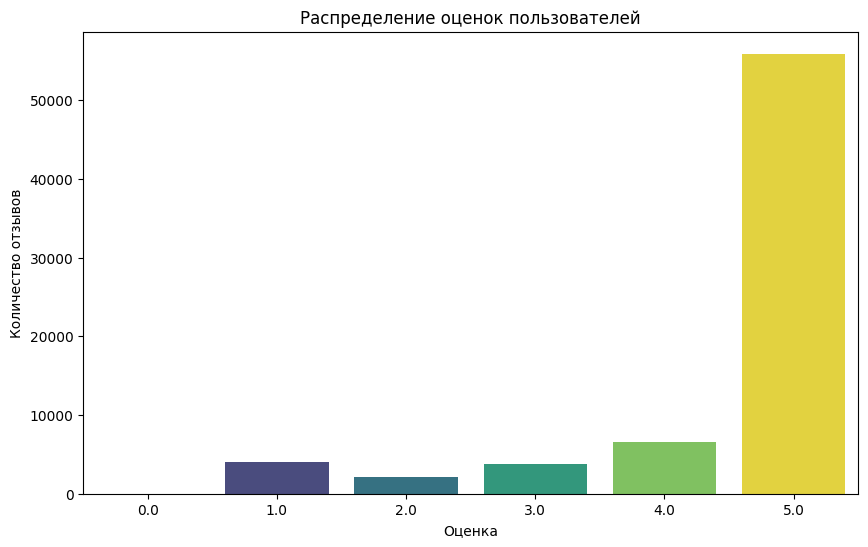

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis', hue='rating', legend=False)
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество отзывов')
plt.show()

### Предобработка текста



In [27]:
russian_stopwords = set(stopwords.words('russian'))
morph = MorphAnalyzer()

In [28]:
df['clean_text'] = (
    df['text']
    .str.lower()
    .str.replace(r'[^а-яё\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .apply(lambda x: ' '.join(word for word in x.split() if word not in russian_stopwords and len(word) > 2))
)

### Лемматизация

In [29]:
df['lemmatized_text'] = (df['clean_text'].apply(lambda x: ' '.join(morph.parse(word)[0].normal_form for word in x.split())))

### Топ-20 слов

In [40]:
all_text = ' '.join(df['lemmatized_text'])
all_words = all_text.split()
word_count = Counter(all_words).most_common(20)
for word, count in word_count:
    print(f"{word}: {count}")

очень: 53190
вкусный: 30217
место: 26027
вкусно: 20115
это: 19749
хороший: 19292
блюдо: 17547
персонал: 16796
еда: 15887
заведение: 15311
ресторан: 14501
приятный: 13474
отличный: 13215
официант: 13145
кухня: 12504
обслуживание: 12162
понравиться: 11575
меню: 10940
цена: 10870
рекомендовать: 10617


### Облако слов

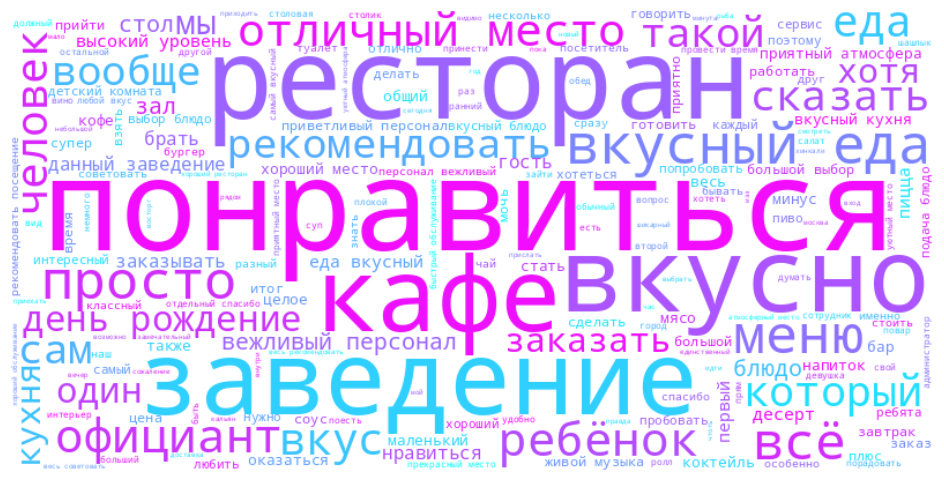

In [41]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cool',
    stopwords={'это', 'очень', 'ещё'}
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Средняя, максимальная, минималльная длина отзыва

In [46]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
print(df.groupby('rating')['review_length'].mean())
print(df.groupby('rating')['review_length'].max())
print(df.groupby('rating')['review_length'].min())

rating
0.0    40.370370
1.0    83.409034
2.0    84.121504
3.0    68.857603
4.0    49.984671
5.0    33.610867
Name: review_length, dtype: float64
rating
0.0    229
1.0    660
2.0    675
3.0    722
4.0    632
5.0    681
Name: review_length, dtype: int64
rating
0.0    9
1.0    4
2.0    3
3.0    3
4.0    1
5.0    1
Name: review_length, dtype: int64
